In [36]:
import numpy as np
import numba as jit

import vpython as vp
import matplotlib.pyplot as plt
import ipywidgets as ipy

import numpy.random as rd

# TP2

## Exercício 1

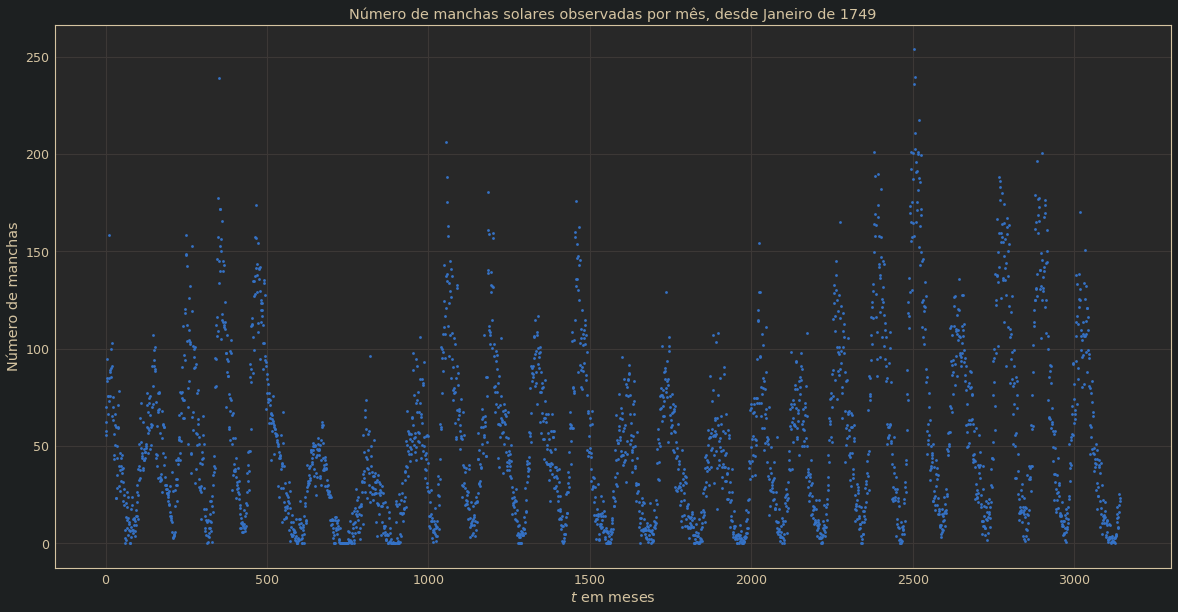

In [13]:
# Alínea 1

# Import the sunspots data, extract coordinates
sunspot_data = np.loadtxt("sunspots.txt",float)
x = sunspot_data[:,0]
y = sunspot_data[:,1]

plt.figure(figsize=(20,10))
plt.title("Número de manchas solares observadas por mês, desde Janeiro de 1749")
plt.xlabel("$t$ em meses")
plt.ylabel("Número de manchas")
plt.plot(x,y,'.')
plt.show()

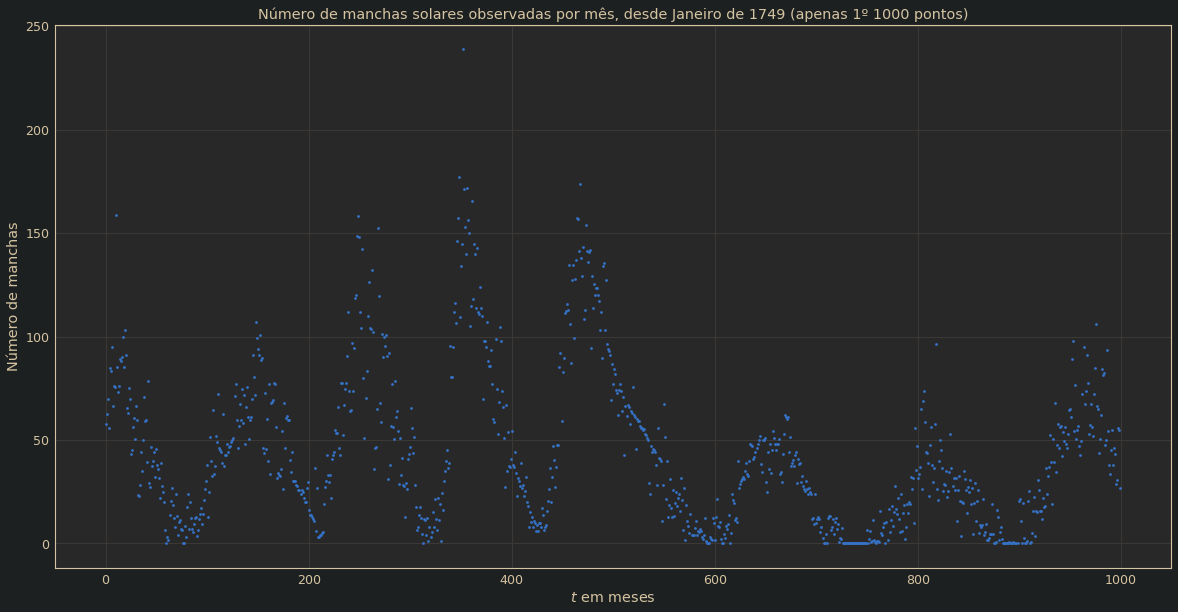

In [14]:
# Alínea 2

# Just the first 1000 data points
x2 = x[:1000]
y2 = y[:1000]

# Draw the graphic
plt.figure(figsize=(20,10))
plt.title("Número de manchas solares observadas por mês, desde Janeiro de 1749 (apenas 1º 1000 pontos)")
plt.xlabel("$t$ em meses")
plt.ylabel("Número de manchas")
plt.plot(x2,y2,'.')
plt.show()

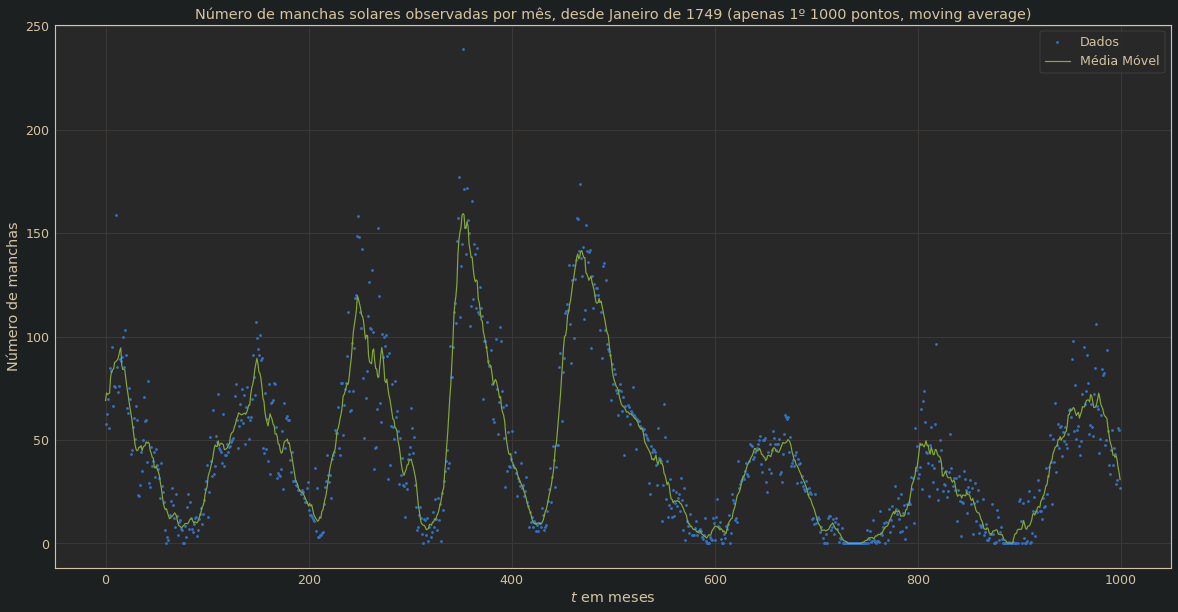

In [15]:
# Alínea 3

# IMPORTANT: we're not checking whether len(arr) < r, the caller should only provides with data we can handle
def moving_average(r,k,arr):
    if k < r:
        return (1/len(arr[:k+r+1]))*sum(arr[:k+r+1])
    elif k > len(arr) - r:
        return (1/len(arr[k-r:]))*sum(arr[k-r:])
    else:
        return (1/(2*r+1))*sum(arr[k-r:k+r+1])

# Using x and y again, to calculate the averages
y_mov_average = np.empty(1000)
for i in range(1000):
    y_mov_average[i] = moving_average(5,i,y)

# Draw the graph
plt.figure(figsize=(20,10))
plt.title("Número de manchas solares observadas por mês, desde Janeiro de 1749 (apenas 1º 1000 pontos, moving average)")
plt.xlabel("$t$ em meses")
plt.ylabel("Número de manchas")
plt.plot(x[:1000],y[:1000],'.',label="Dados")
plt.plot(x[:1000],y_mov_average,label="Média Móvel")
plt.legend()
plt.show()

In [16]:
def plot(r):
    for i in range(1000):
        y_mov_average[i] = moving_average(r,i,y)
    plt.figure(figsize=(20,10))
    plt.title("Número de manchas solares observadas por mês, desde Janeiro de 1749 (apenas 1º 1000 pontos, moving average)")
    plt.xlabel("$t$ em meses")
    plt.ylabel("Número de manchas")
    plt.plot(x[:1000],y[:1000],'.',label="Dados")
    plt.plot(x[:1000],y_mov_average,label="Média Móvel")
    plt.legend()
    plt.show()


ipy.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

ipy.interact(plot, r=5)


interactive(children=(IntSlider(value=5, description='r', max=15, min=-5), Output()), _dom_classes=('widget-in…

<function __main__.plot(r)>

## Exercício 2

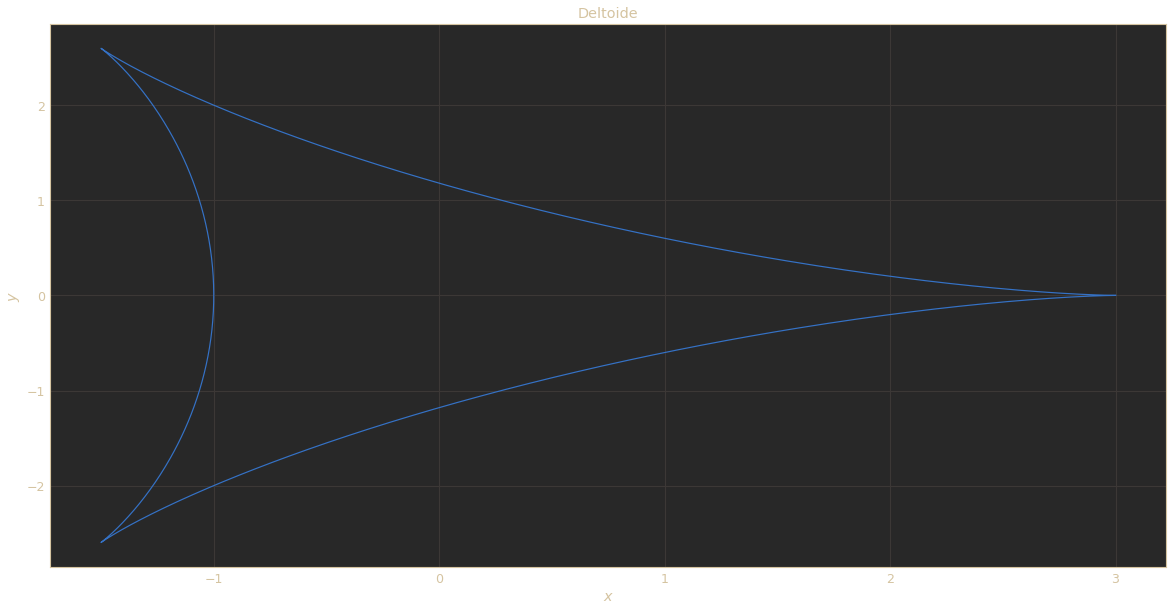

In [30]:
# Alínea 1

def x_deltoide(theta):
    return 2*np.cos(theta)+np.cos(2*theta)

def y_deltoide(theta):
    return 2*np.sin(theta)-np.sin(2*theta)

# Calculate x and y arrays
theta = np.linspace(0,2*np.pi,num=800)
x = x_deltoide(theta)
y = y_deltoide(theta)

# Draw the graph
plt.figure(figsize=(20,10))
plt.title("Deltoide")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.plot(x,y)
plt.show()

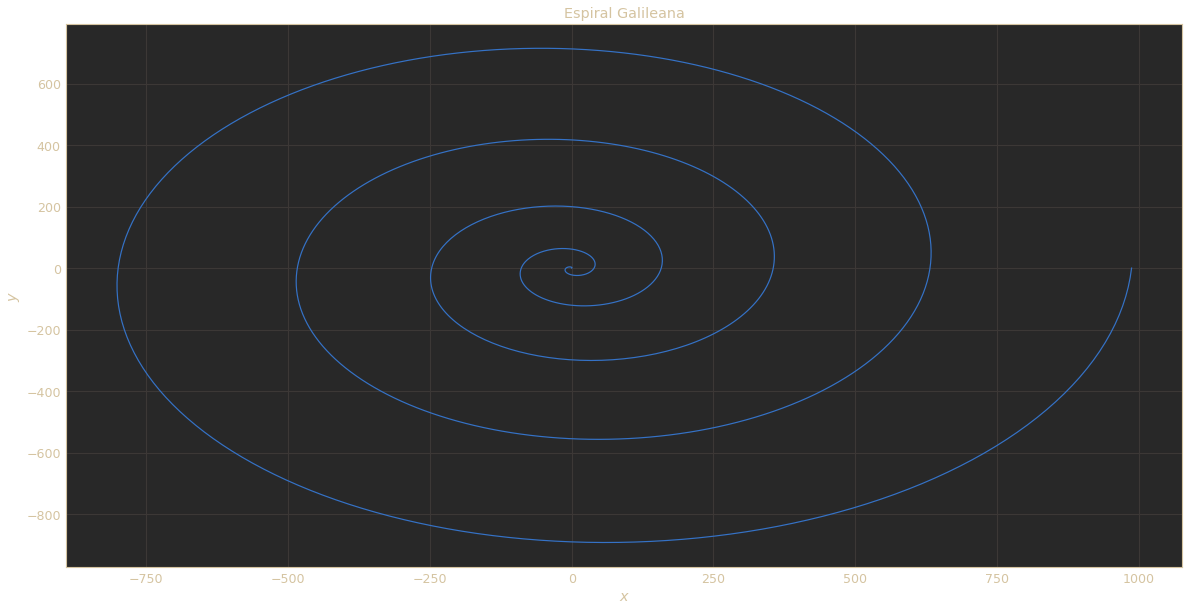

In [32]:
# Alínea 2

# Define the functions for x and y in terms of theta (the inputs are in the form r=f(theta), f is an arbitrary function)
def x_from_polar(theta,func):
    return func(theta)*np.cos(theta)

def y_from_polar(theta,func):
    return func(theta)*np.sin(theta)

def func(theta):
    return theta**2

# Calculate x and y arrays
theta = np.linspace(0,10*np.pi,num=1000)
x = x_from_polar(theta,func)
y = y_from_polar(theta,func)

# Draw the graph
plt.figure(figsize=(20,10))
plt.title("Espiral Galileana")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.plot(x,y)
plt.show()

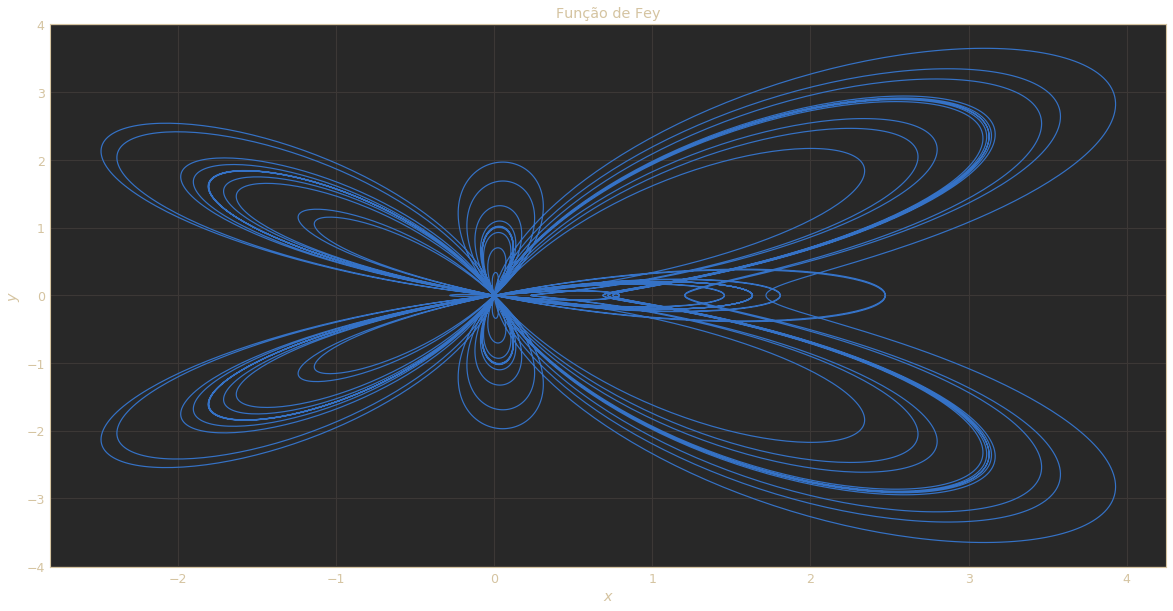

In [35]:
# Alínea 3

def func2(theta):
    return np.exp(np.cos(theta)) - 2*np.cos(4*theta)+np.sin(theta/12)**5

# Calculate x and y arrays
theta = np.linspace(0,24*np.pi,num=10000)
x = x_from_polar(theta,func2)
y = y_from_polar(theta,func2)

# Draw the graph
plt.figure(figsize=(20,10))
plt.title("Função de Fey")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.plot(x,y)
plt.show()

## Exercício 3

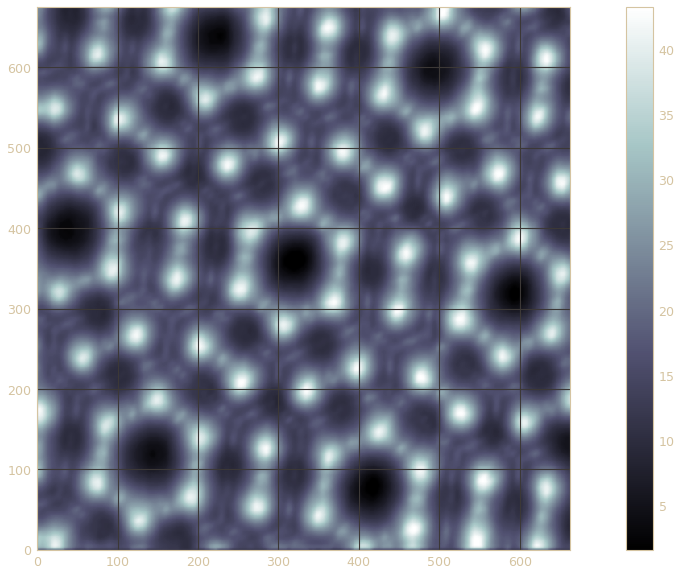

In [50]:
stm_data = np.loadtxt("stm.txt",float)

# Draw the graph
plt.figure(figsize=(20,10))
plt.imshow(stm_data.T,origin="lower")
plt.bone()
plt.colorbar()
plt.show()

## Exercício 6

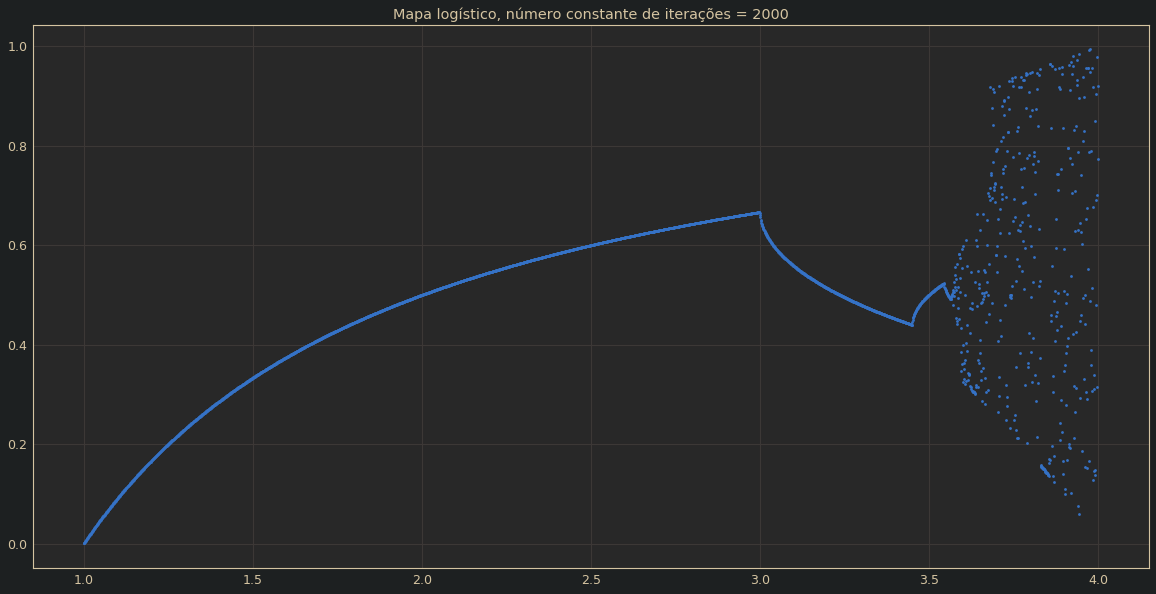

In [60]:
# Mapa logístico, número constante de iterações

def logistic_map(r, iter_num):
    # Create an x array equal to r
    x = 0.5 + 0.*r
    
    # Iterate iter_num times
    for i in range(iter_num):
        x = r*x*(1-x)
    return x

iter_num = 2000 # Iteration number for each point, fixed

# Create the display arrays
r_array = np.arange(1,4,0.001)
y_array = logistic_map(r_array,iter_num)

# Draw the graph
plt.figure(figsize=(20,10))
plt.title("Mapa logístico, número constante de iterações = "+str(iter_num))
plt.plot(r_array,y_array,'.')
plt.show()

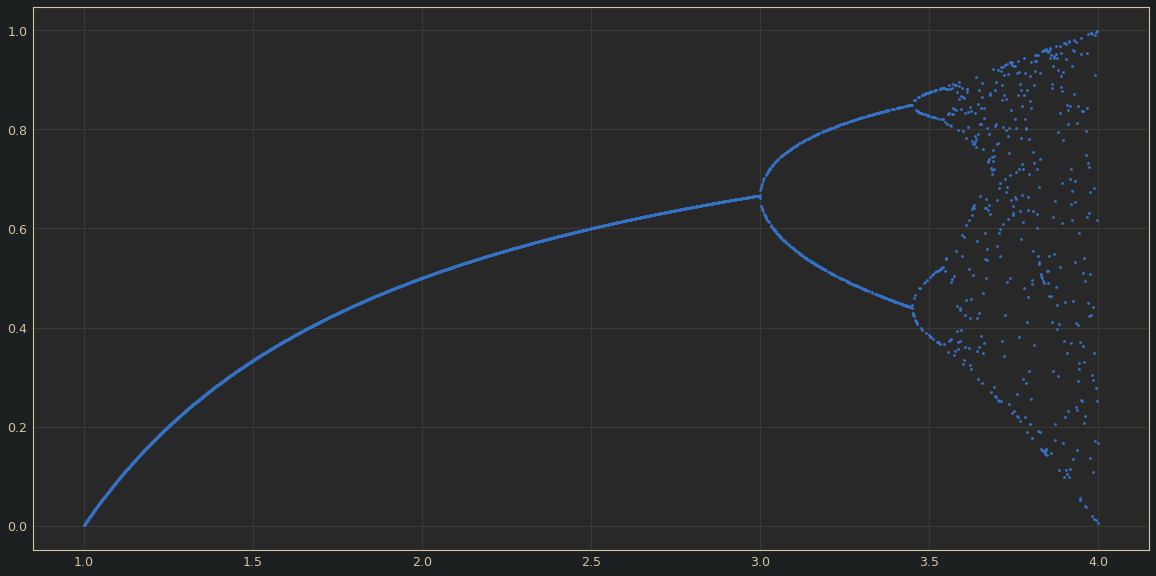

In [51]:
# Mapa logístico, número variável de iterações, versão 1

# Takes arguments r (int), number of initial iterations (initial_iter, int), and the range for the random number of iterations
def logistic_map(r, num_iter):
    x = 0.5
    # Iterate iter_num + random number of times
    for i in range(num_iter):
        x = r*x*(1-x)
    return x

# Create the display arrays
r_array = np.arange(1,4,0.001)
y_array = np.empty(r_array.size)
rand_array = rd.randint(1000,2000,r_array.size) + 1000 # Number of iterations per point

# Iterate over rand_array, and use y iterated rand[i] times
for i,rand in enumerate(rand_array):
    y_array[i] = logistic_map(r_array[i],rand)

plt.figure(figsize=(20,10))
plt.plot(r_array,y_array,'.')
plt.show()

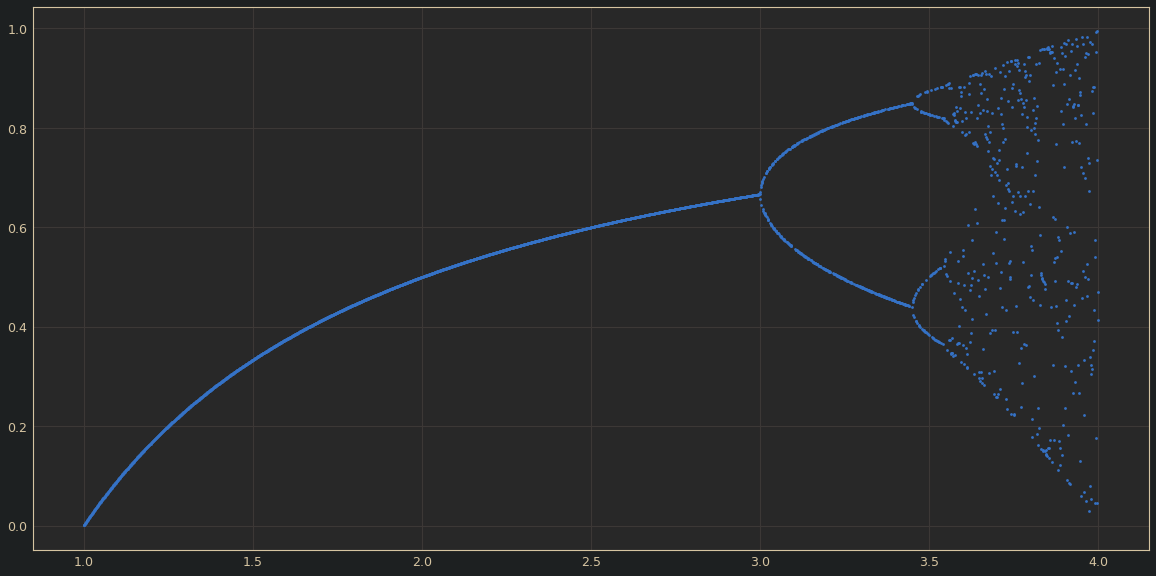

In [61]:
# Mapa logístico, número variável de iterações, versão 2
# Ligeiramente diferente, em vez de usarmos uma lista com o número de iterações para cada y, calculamos na altura
# MAIS EFICIENTE, somehow

def logistic_map(r, initial_iter, show_iter):
    # Create an x array equal to r
    x = 0.5
    
    # Iterate iter_num times
    for i in range(initial_iter+show_iter):
        x = r*x*(1-x)
    return x

# Create the display arrays
r_array = np.arange(1,4,0.001)
y_array = np.empty(len(r_array))


# Iterate over r, use y iterated a random numer of times (calculated on each funtion call)
for i,r in enumerate(r_array):
    y_array[i] = logistic_map(r,1000,np.random.randint(1000,2000))

# Draw the graph
plt.figure(figsize=(20,10))
plt.plot(r_array,y_array,'.')
plt.show()

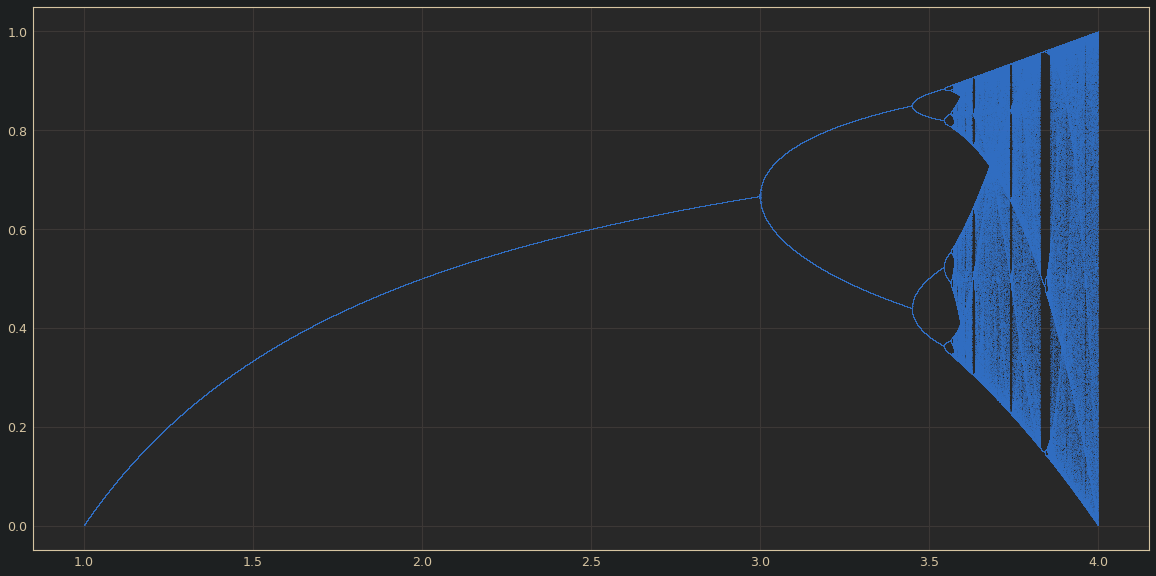

In [62]:
# Mapa logístico, x inicial variável
# O resultado é o mesmo se variarmos o x inicial, mas com isto conseguimos usar os arrays do numpy e é muito mais rápido

# Create the display arrays
r_array = np.arange(1,4,0.000001)
y_array = rd.random(r_array.size) # Random initial value between 0 and 1

# Iterate a fixed number of times
for i in range(1000):
    y_array = r_array*y_array*(1-y_array)

# Draw the graph
plt.figure(figsize=(20,10))
plt.plot(r_array,y_array,'.',markersize = 1)
plt.show()